In [1]:
cd /home

/home


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os 


os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [46]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000, ngpu=1):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.sf = tf.pow(10.,ngpu-1)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, float)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return (tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2))*self.sf


0
1
2
3


Text(0, 0.5, 'Learning Rate')

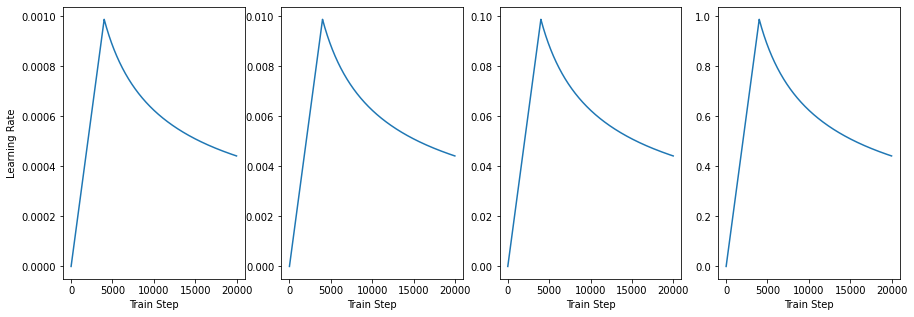

In [48]:
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=False)
for k, fac in enumerate([0,1,2,3]):
    print(fac)
    scheduler = CustomSchedule(256, ngpu=fac)
    learning_rates = scheduler(tf.range(20000, dtype=tf.float32))
    axes[k].plot(learning_rates)
    axes[k].set_xlabel('Train Step')
axes[0].set_ylabel('Learning Rate')

2022-09-02 19:28:15.435139: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2022-09-02 19:28:15.435180: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (477e540a65eb): /proc/driver/nvidia/version does not exist
2022-09-02 19:28:15.436440: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Text(0, 0.5, 'Learning Rate')

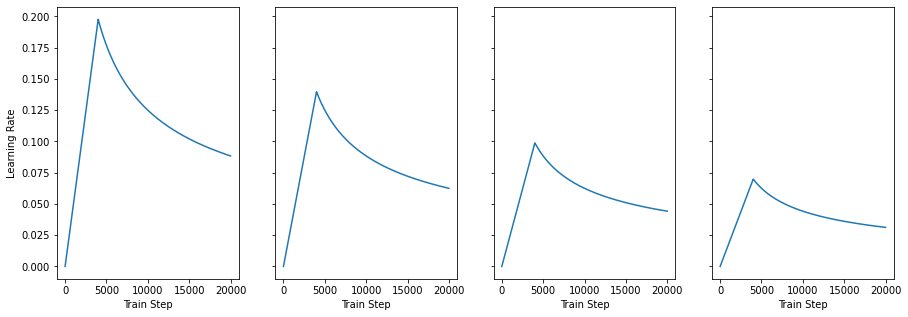

In [6]:
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
for k, n_dim in enumerate([64, 128, 256, 512]):
    scheduler = CustomSchedule(n_dim)
    learning_rates = scheduler(tf.range(20000, dtype=tf.float32))
    axes[k].plot(learning_rates)
    axes[k].set_xlabel('Train Step')
axes[0].set_ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

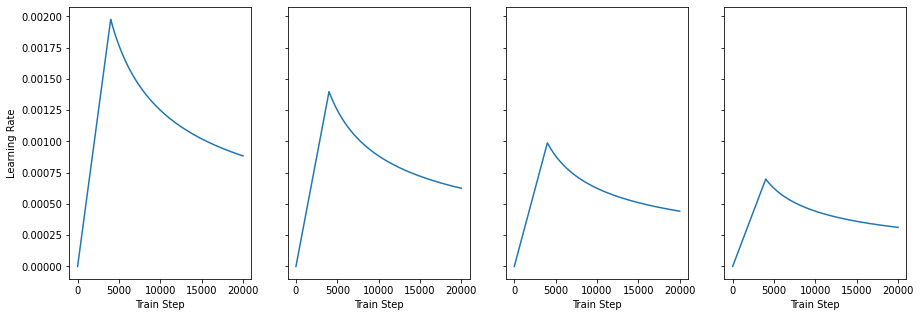

In [6]:
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
for k, n_dim in enumerate([64, 128, 256, 512]):
    scheduler = CustomSchedule(n_dim)
    learning_rates = scheduler(tf.range(20000, dtype=tf.float32))
    axes[k].plot(learning_rates)
    axes[k].set_xlabel('Train Step')
    
axes[0].set_ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

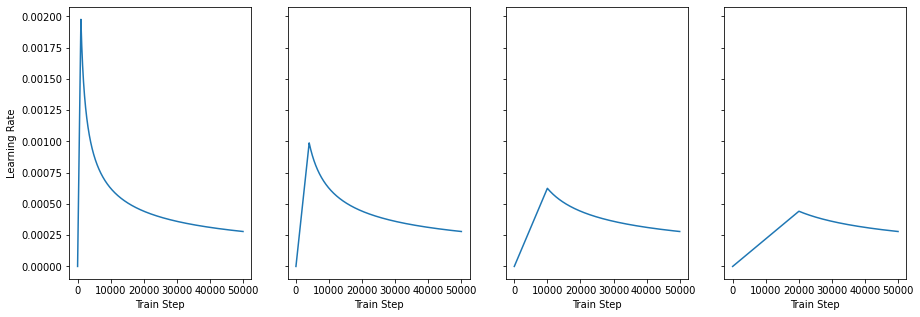

In [7]:
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
for k, n_dim in enumerate([1000, 4000, 10000, 20000]):
    scheduler = CustomSchedule(256, warmup_steps=n_dim)
    learning_rates = scheduler(tf.range(50000, dtype=tf.float32))
    axes[k].plot(learning_rates)
    axes[k].set_xlabel('Train Step')
    
axes[0].set_ylabel('Learning Rate')